In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

# Data

In [3]:
df = pd.read_csv('insurance.csv')
df.head()

,age,salary,bought_insurance
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


# Age as predictor

In [4]:
x, y = df.age.values.reshape(-1,1), df.bought_insurance.values.reshape(-1,1)

print(x.shape, y.shape)

(400, 1) (400, 1)


Text(0, 0.5, 'bought insurance?')

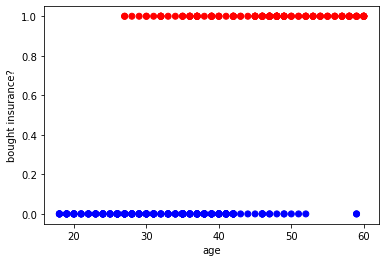

In [5]:
plt.scatter(x, y, c=y, cmap='bwr')
plt.xlabel('age')
plt.ylabel('bought insurance?')

# Scikit-learn model

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,train_size=0.9)

In [12]:
from sklearn.linear_model import LogisticRegression 
logreg_model = LogisticRegression() #(C=1e15, max_iter=1000, solver='newton-cg', random_state=42)
logreg_model.fit(X_train, y_train.ravel())

print('intercept_:', logreg_model.intercept_)
print('coef_:', logreg_model.coef_)
print('accuracy: {:.2f}%'.format(logreg_model.score(X_test, y_test)*100))

intercept_: [-8.09980881]
coef_: [[0.19038561]]
accuracy: 82.50%


Text(0, 0.5, 'bought insurance?')

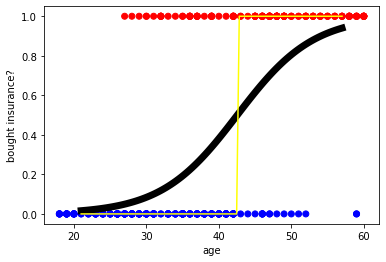

In [13]:
X_test = np.linspace(X_test.min(), X_test.max(), 100).reshape(-1,1)
y_pred_prob = logreg_model.predict_proba(X_test)
y_pred = logreg_model.predict(X_test)

plt.scatter(X_train, y_train, c=y_train, cmap='bwr')
plt.plot(X_test, y_pred_prob[:,1], color='black', linewidth=7.0)
plt.plot(X_test, y_pred, color='yellow')
plt.xlabel('age')
plt.ylabel('bought insurance?')

In [14]:
#Predicting individual
point_prediction=logreg_model.predict([[3]])
print (point_prediction)

#Many predictions
ages = [[30],[20],[50]]
many_prediction=logreg_model.predict(ages)
print (many_prediction)

[0]
[0 0 1]


# Age and Salary as predictors

In [15]:
x, y = df[['age', 'salary']].values, df.bought_insurance.values.reshape(-1,1)

print(x.shape, y.shape)

(400, 2) (400, 1)


Text(0.5, 0, 'bought insurance?')

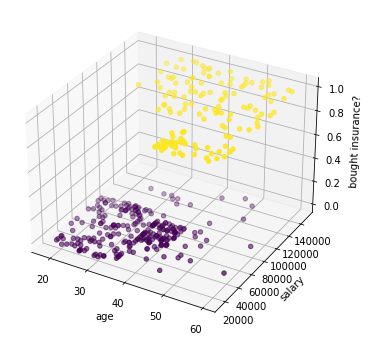

In [153]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x[:,0], x[:,1], y, c=y.ravel())
plt.xlabel('age')
plt.ylabel('salary')
ax.set_zlabel('bought insurance?')

# Scikit-learn model

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,train_size=0.9)

In [20]:
#MinMax Scaling
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler(feature_range=(-1,1))
X_test = minmax.fit_transform(X_test.astype(np.float64))

print(X_test.min(), X_test.max())

-1.0 1.0


In [21]:
logreg_model_2 = LogisticRegression() #(C=1e15, max_iter=1000, solver='newton-cg', random_state=42)
logreg_model_2.fit(X_train, y_train.ravel())

print('intercept_:', logreg_model_2.intercept_)
print('coef_:', logreg_model_2.coef_)
print('accuracy: {:.2f}%'.format(logreg_model_2.score(X_test, y_test)*100))

intercept_: [-2.16067749e-10]
coef_: [[-1.73203298e-09 -2.26652045e-06]]
accuracy: 25.00%


[[-1.         -1.        ]
 [-0.95918367 -1.        ]
 [-0.91836735 -1.        ]
 ...
 [ 0.91836735  1.        ]
 [ 0.95918367  1.        ]
 [ 1.          1.        ]]
[1 1 1 ... 0 0 0]


Text(0.5, 0, 'bought insurance?')

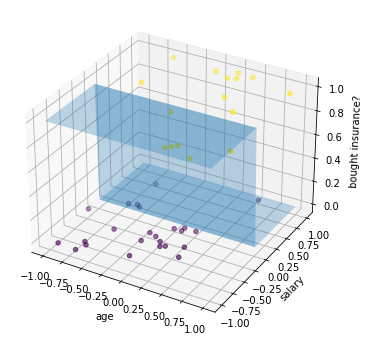

In [157]:
x1 = np.linspace(X_test[:, 0].min(), X_test[:, 0].max())
x2 = np.linspace(X_test[:, 1].min(), X_test[:, 1].max())
x1_mesh, x2_mesh = np.meshgrid(x1, x2)
x1_mesh = x1_mesh.reshape(-1, 1)
x2_mesh = x2_mesh.reshape(-1, 1)

x_mesh = np.hstack((x1_mesh, x2_mesh))
y_pred = logreg_model_2.predict(x_mesh)


fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X_test[:,0], X_test[:,1], y_test, c=y_test.ravel())
ax.plot_trisurf(x1_mesh.ravel(), x2_mesh.ravel(), y_pred.ravel(), alpha=0.3, shade=False)
plt.xlabel('age')
plt.ylabel('salary')
ax.set_zlabel('bought insurance?')


In [22]:
#Predicting individual
#reshape for 1 feature (-1,1), reshape for 1 sample (1,-1)
age=np.array([30,150000]).reshape(1,-1)
age =minmax.fit_transform(age.astype(np.float64))
point_prediction=logreg_model_2.predict(age)
print (point_prediction)

#Many predictions
ages = np.array([[30, 150000],[20, 120000],[50, 200000]])
ages=minmax.fit_transform(ages.astype(np.float64))
many_prediction=logreg_model_2.predict(ages)
print (many_prediction)

[1]
[1 1 0]
